In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



# First steps with the GAN

As we learned in the theory session, a GAN is a min-max adversarial game between a generator (the counterfiet maker), and the discriminator (the cop whose task is to differentiate between the real and the fake). The original GAN paper from 2014, that we covered in our theory session, is: https://arxiv.org/abs/1406.2661

We will explore how GANs work by looking at it in action for $\mathbb{R}^2$-space real data. An excellent playground to learn about it is at:

https://poloclub.github.io/ganlab/

Play around and see what happens when you make the discriminator far more powerful than the generator; try other combinations. Change the optimizer to **Adam**, and decrease the learning rate for for generator and optimizer.

Also, use the pause button to play the learning process step by step, to see how the gradient is propagated for the learning to take place.

## DCGan

Since images are more intuitive and relatable, considerable amount of GAN literature deals with generating images and videos. Let us consider one of the earliest and simplest deep-convolutional GAN (DCGAN), which uses a deep convolutional network for discriminator, and a "deconvolutional-like" (more strictly, a convolution-transpose) network for generator.

The original paper from 2016 is: https://arxiv.org/abs/1511.06434

In [5]:
import torch
use_gpu = True if torch.cuda.is_available() else False

model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub', 'DCGAN', pretrained=True, useGPU=use_gpu)


Downloading: "https://github.com/facebookresearch/pytorch_GAN_zoo/zipball/hub" to /home/asif/.cache/torch/hub/hub.zip
Downloading: "https://dl.fbaipublicfiles.com/gan_zoo/DCGAN_fashionGen-1d67302.pth" to /home/asif/.cache/torch/hub/checkpoints/DCGAN_fashionGen-1d67302.pth
100%|█████████████████████████████████████████████| 39.7M/39.7M [00:00<00:00, 103MB/s]

Average network found !


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


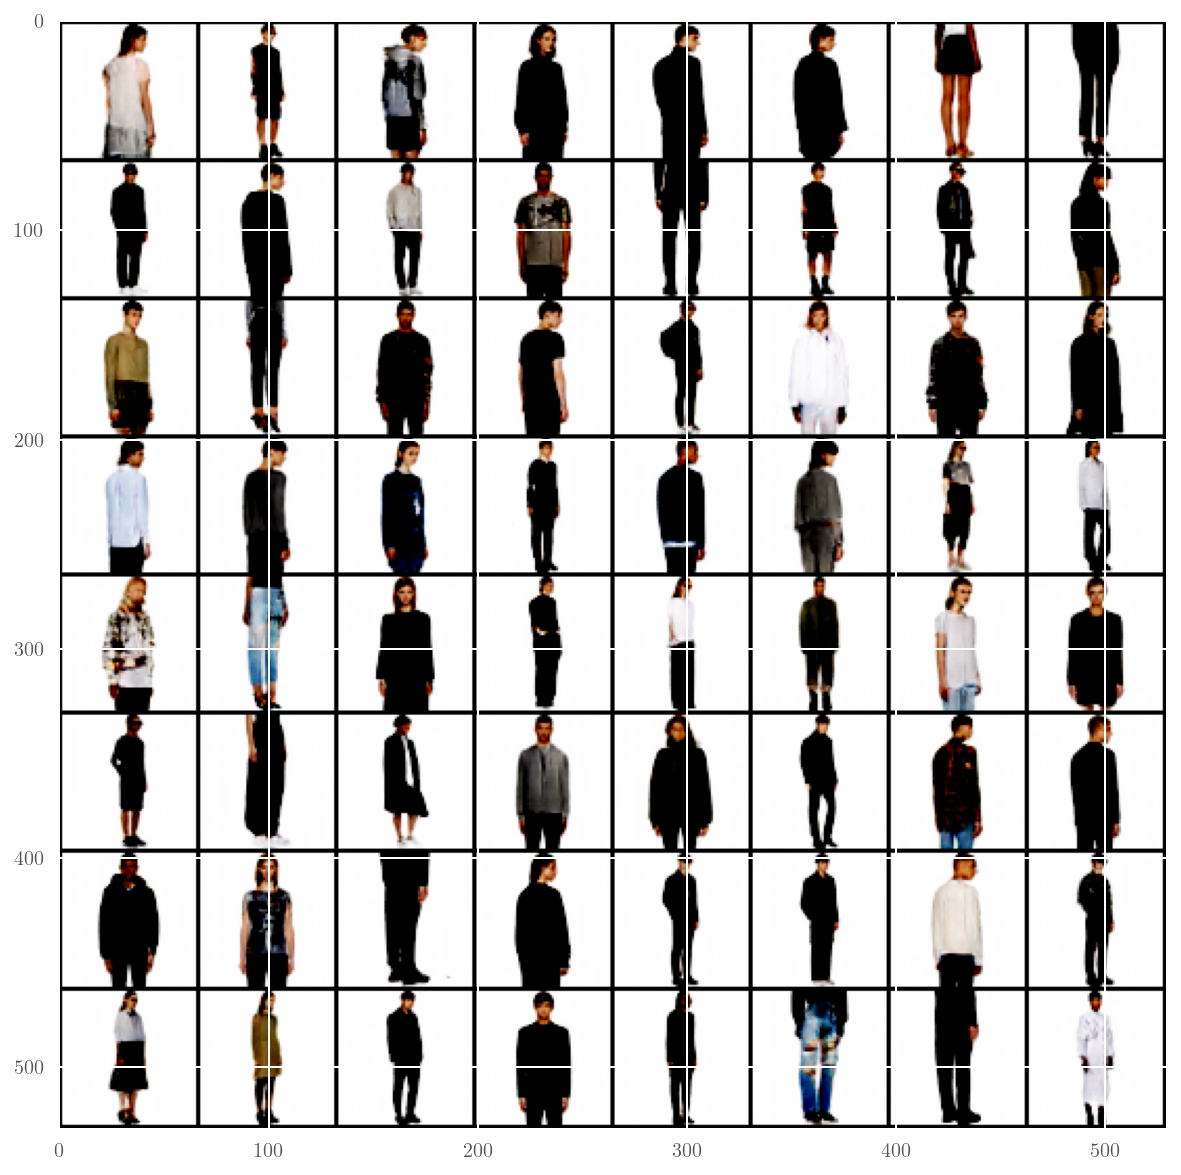

In [7]:
num_images = 64
noise, _ = model.buildNoiseData(num_images)
with torch.no_grad():
    generated_images = model.test(noise)

# let's plot these images using torchvision and matplotlib
import matplotlib.pyplot as plt
import torchvision
plt.imshow(torchvision.utils.make_grid(generated_images).permute(1, 2, 0).cpu().numpy());
# plt.show()

## Progressive GAN

Progressively generate higher and higher resolution by successively adding bigger convolutional & deconvolutioonal layers to the discriminator and the generator respectively.

Read more of this at: https://arxiv.org/abs/1710.10196

The following is taken from the excellent description of usage at: https://pytorch.org/hub/facebookresearch_pytorch-gan-zoo_pgan/

In [2]:
import torch
use_gpu = True if torch.cuda.is_available() else False
# Taken from the pytorch website resources.
# trained on high-quality celebrity faces "celebA" dataset
# this model outputs 512 x 512 pixel images
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'PGAN', model_name='celebAHQ-512',
                       pretrained=True, useGPU=use_gpu)
# this model outputs 256 x 256 pixel images
# model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
#                        'PGAN', model_name='celebAHQ-256',
#                        pretrained=True, useGPU=use_gpu)

Using cache found in /home/asif/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub
Downloading: "https://dl.fbaipublicfiles.com/gan_zoo/PGAN/celebaHQ16_december_s7_i96000-9c72988c.pth" to /home/asif/.cache/torch/hub/checkpoints/celebaHQ16_december_s7_i96000-9c72988c.pth
100%|██████████████████████████████████████████████████████████████████████████████████████████| 264M/264M [00:04<00:00, 57.0MB/s]


Average network found !


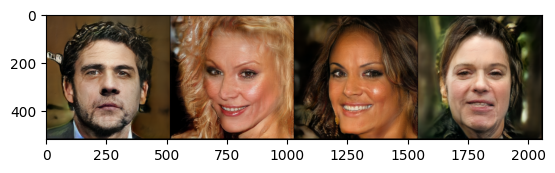

In [3]:
num_images = 4
noise, _ = model.buildNoiseData(num_images)
with torch.no_grad():
    generated_images = model.test(noise)

# let's plot these images using torchvision and matplotlib
import matplotlib.pyplot as plt
import torchvision
grid = torchvision.utils.make_grid(generated_images.clamp(min=-1, max=1), scale_each=True, normalize=True)
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
# plt.show()